# 7장 연관분석

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 관련 패키지
# apoyori 다운 받아야 될수도 있음.
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter
from apyori import apriori

---
---

## 01. 데이터 불러오기

In [3]:
os.getcwd()

'C:\\Users\\rbtkd\\ADP_codingbook\\연관분석'

In [4]:
data = pd.read_csv("./data/lotto.csv")
data.head()

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44


In [5]:
lotto = data.drop(['time_id'],axis=1)
lotto.head()

,num1,num2,num3,num4,num5,num6
0,8,22,35,38,39,41
1,9,13,32,38,39,43
2,6,10,16,28,34,38
3,10,24,40,41,43,44
4,8,15,17,19,43,44


---

## 02. 연관분석에 맞게 데이터 변환

In [6]:
# 숫자를 문자로 변환시킨다.
lotto = lotto.astype('string')

In [7]:
# lotto 값들을 list화 시킨다.
df_list = lotto.values.tolist()

In [8]:
# Transaction data로 인코딩
te = TransactionEncoder()
te_ary = te.fit_transform(df_list)

In [9]:
df = pd.DataFrame(te_ary, columns = te.columns_)

In [10]:
df

,1,10,11,12,13,14,15,16,17,18,...,41,42,43,44,45,5,6,7,8,9
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,True,False,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,False
855,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
856,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
857,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


---

## 04. 어떤 데이터가 많이 나오는지 확인하는 분석

In [11]:
# 리스트화 시킨 값들을 array로 바꿔 flatten함수 적용시킨 다음 다시 리스트화
list_counts = np.array(df_list).flatten().tolist()
list_counts

['8',
 '22',
 '35',
 '38',
 '39',
 '41',
 '9',
 '13',
 '32',
 '38',
 '39',
 '43',
 '6',
 '10',
 '16',
 '28',
 '34',
 '38',
 '10',
 '24',
 '40',
 '41',
 '43',
 '44',
 '8',
 '15',
 '17',
 '19',
 '43',
 '44',
 '20',
 '25',
 '31',
 '32',
 '36',
 '43',
 '2',
 '8',
 '23',
 '26',
 '27',
 '44',
 '11',
 '17',
 '28',
 '30',
 '33',
 '35',
 '14',
 '18',
 '22',
 '26',
 '31',
 '44',
 '16',
 '20',
 '24',
 '28',
 '36',
 '39',
 '5',
 '13',
 '17',
 '29',
 '34',
 '39',
 '1',
 '2',
 '16',
 '22',
 '38',
 '39',
 '12',
 '16',
 '26',
 '28',
 '30',
 '42',
 '5',
 '18',
 '30',
 '41',
 '43',
 '45',
 '1',
 '16',
 '29',
 '33',
 '40',
 '45',
 '7',
 '8',
 '13',
 '15',
 '33',
 '45',
 '19',
 '21',
 '30',
 '33',
 '34',
 '42',
 '14',
 '26',
 '32',
 '36',
 '39',
 '42',
 '5',
 '11',
 '14',
 '30',
 '33',
 '38',
 '2',
 '4',
 '11',
 '28',
 '29',
 '43',
 '3',
 '9',
 '11',
 '12',
 '13',
 '19',
 '9',
 '14',
 '17',
 '33',
 '36',
 '38',
 '2',
 '25',
 '28',
 '30',
 '33',
 '45',
 '1',
 '9',
 '11',
 '14',
 '26',
 '28',
 '9',
 '10',
 

In [13]:
# 위의 list_counts의 수를 센다.
from collections import Counter
count = Counter(list_counts)

In [14]:
# 해당 수가 나온 횟수를 튜플형식으로 바꾸어 sorted(많이나온 것 부터)
sorted_C_union = sorted(count.items(), key=lambda x :(-x[1],x[0]))
sorted_C_union

[('34', 134),
 ('27', 126),
 ('40', 126),
 ('43', 125),
 ('20', 124),
 ('12', 123),
 ('17', 123),
 ('1', 122),
 ('10', 122),
 ('13', 122),
 ('14', 122),
 ('18', 121),
 ('33', 121),
 ('45', 121),
 ('11', 120),
 ('5', 119),
 ('8', 119),
 ('19', 118),
 ('31', 118),
 ('39', 118),
 ('37', 117),
 ('15', 116),
 ('26', 116),
 ('24', 115),
 ('36', 115),
 ('4', 115),
 ('7', 114),
 ('38', 113),
 ('44', 113),
 ('2', 112),
 ('21', 112),
 ('25', 111),
 ('3', 111),
 ('16', 110),
 ('42', 108),
 ('6', 108),
 ('29', 106),
 ('35', 106),
 ('28', 105),
 ('30', 105),
 ('41', 105),
 ('23', 99),
 ('32', 97),
 ('22', 92),
 ('9', 89)]

In [16]:
# 위 sorted한 데이터를 dataframe으로 만든다
d = pd.DataFrame.from_dict(sorted_C_union)
d

,0,1
0,34,134
1,27,126
2,40,126
3,43,125
4,20,124
5,12,123
6,17,123
7,1,122
8,10,122
9,13,122


In [17]:
# 그리고 데이터프레임의 컬럼명 정해주고, 10개만 추출
d.rename(columns={0:'num', 1:'count'},inplace=True)
d = d.sort_values(by='count', ascending=False)[:10]
d

,num,count
0,34,134
2,40,126
1,27,126
3,43,125
4,20,124
5,12,123
6,17,123
9,13,122
10,14,122
8,10,122


<BarContainer object of 10 artists>

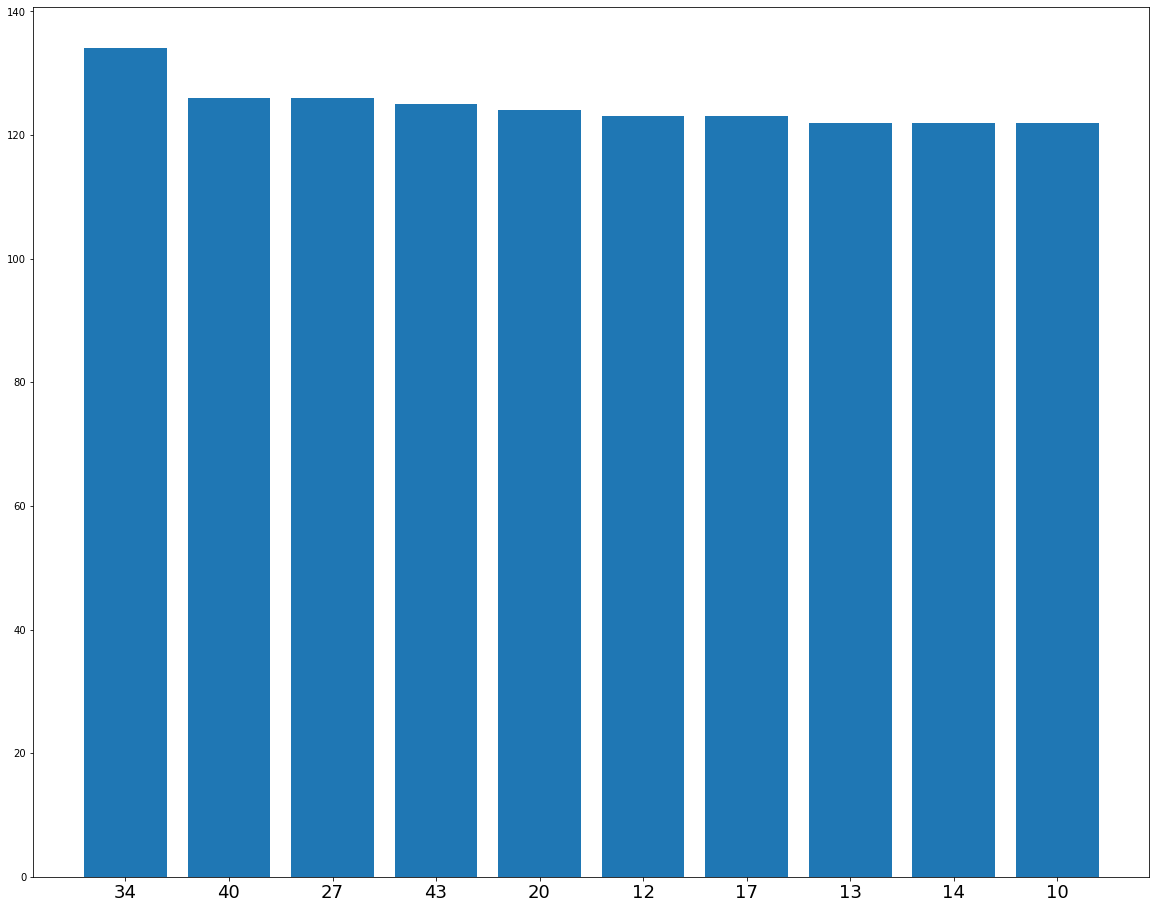

In [18]:
# 위 결과 시각화
plt.figure(figsize=(20,16))
plt.xticks(fontsize=18)
plt.bar(d['num'].values, d['count'].values)

---
---

## 05. 연관분석 (지지도,신뢰도 사용)

In [43]:
from mlxtend.frequent_patterns import apriori, association_rules

# 최소지지도 0.002
frequent_itemsets = apriori(df, min_support=0.002, use_colnames=True)

# 최소신뢰도 0.8를 적용시켜주기 위한 과정
frequent_ = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.8)

In [44]:
frequent_itemsets

,support,itemsets
0,0.142026,(1)
1,0.142026,(10)
2,0.139697,(11)
3,0.143190,(12)
4,0.142026,(13)
...,...,...
6358,0.002328,"(27, 14, 30, 40, 31)"
6359,0.002328,"(19, 34, 21, 15, 44)"
6360,0.002328,"(16, 43, 36, 26, 31)"
6361,0.002328,"(18, 6, 45, 38, 31)"


In [36]:
frequent_
'''
여기서, 조건절(Antecedent)은 규칙에서‘만일 ~라면’에 해당하는 부분
        결과절(Consequent)은 그 '~이다'에 해당하는 부분
'''

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(1, 10, 17)",(31),0.002328,0.137369,0.002328,1.0,7.279661,0.002008,inf
1,"(1, 10, 31)",(17),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf
2,"(1, 40, 20)",(10),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
3,"(40, 10, 20)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
4,"(14, 1, 11)",(26),0.002328,0.135041,0.002328,1.0,7.405172,0.002014,inf
...,...,...,...,...,...,...,...,...,...
699,"(34, 7, 31)","(24, 22)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
700,"(24, 7, 31)","(34, 22)",0.002328,0.017462,0.002328,1.0,57.266667,0.002288,inf
701,"(22, 7, 31)","(24, 34)",0.002328,0.017462,0.002328,1.0,57.266667,0.002288,inf
702,"(24, 34, 22)","(7, 31)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf


In [45]:
# 조합수의 길이를 지정해주는 antecedent_len 이라는 컬럼을 만든다.
frequent_['antecedents_len'] = frequent_['antecedents'].apply(lambda x:len(x)) + frequent_['consequents'].apply(lambda x:len(x))

In [48]:
# 최대조합수 6개, 최소 조합수 2개
freq=frequent_[ (frequent_['antecedents_len'] >= 3) &  (frequent_['antecedents_len'] <= 6)]
freq

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
0,"(1, 10, 17)",(31),0.002328,0.137369,0.002328,1.0,7.279661,0.002008,inf,4
1,"(1, 10, 31)",(17),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf,4
2,"(1, 40, 20)",(10),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,4
3,"(40, 10, 20)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,4
4,"(14, 1, 11)",(26),0.002328,0.135041,0.002328,1.0,7.405172,0.002014,inf,4
...,...,...,...,...,...,...,...,...,...,...
699,"(34, 7, 31)","(24, 22)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
700,"(24, 7, 31)","(34, 22)",0.002328,0.017462,0.002328,1.0,57.266667,0.002288,inf,5
701,"(22, 7, 31)","(24, 34)",0.002328,0.017462,0.002328,1.0,57.266667,0.002288,inf,5
702,"(24, 34, 22)","(7, 31)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5


In [49]:
# 결과 : lift 기준으로 내림차순 상위 30개
result = freq.sort_values(by='lift', ascending=False)[:30]
result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
688,"(26, 31, 16)","(43, 36)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
702,"(24, 34, 22)","(7, 31)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
699,"(34, 7, 31)","(24, 22)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
703,"(24, 22, 31)","(34, 7)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
637,"(34, 10, 36)","(44, 22)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
667,"(14, 26, 21)","(18, 15)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
686,"(26, 43, 16)","(31, 36)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
651,"(24, 15, 20)","(12, 30)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
685,"(36, 43, 16)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf,5
638,"(34, 10, 22)","(44, 36)",0.002328,0.016298,0.002328,1.0,61.357143,0.002290,inf,5


In [50]:
# 결과 csv로 저장
result.to_csv('./data/result.csv')

---
---

## apyori 사용한 연관분석 다른과정
- 신뢰도, 향상도 따로 안주어도 되고, 같이 조건줄 수 있음
- 근데 패키지가 달라서인지는 몰라도, 결과가 좀 다르다!

In [51]:
from apyori import apriori

association_rules = apriori(lotto.values.tolist(),
                            min_support = 0.002,
                            min_confidence = 0.8,
                            max_length=6
                           )

In [52]:
rules_1 = list(association_rules)
pd.DataFrame(rules_1)

,items,support,ordered_statistics
0,"(1, 10, 17, 31)",0.002328,"[((1, 10, 17), (31), 1.0, 7.279661016949152), ..."
1,"(40, 1, 10, 20)",0.002328,"[((40, 1, 20), (10), 1.0, 7.040983606557377), ..."
2,"(14, 1, 11, 26)",0.002328,"[((14, 1, 11), (26), 1.0, 7.405172413793103), ..."
3,"(1, 11, 18, 5)",0.002328,"[((1, 11, 5), (18), 1.0, 7.099173553719009), (..."
4,"(1, 11, 21, 44)",0.002328,"[((1, 11, 21), (44), 1.0, 7.601769911504425), ..."
...,...,...,...
389,"(27, 14, 30, 40, 31)",0.002328,"[((14, 40, 30), (31, 27), 1.0, 53.6875), ((14,..."
390,"(19, 34, 21, 15, 44)",0.002328,"[((19, 21, 44), (34, 15), 1.0, 40.904761904761..."
391,"(16, 43, 36, 26, 31)",0.002328,"[((26, 31, 16), (43, 36), 1.0, 78.090909090909..."
392,"(18, 6, 45, 38, 31)",0.002328,"[((6, 45, 18), (38, 31), 1.0, 57.2666666666666..."


In [53]:
Rule= []
Support = []
Confidence = []
lift = []

for item in rules_1:
    Support.append(item[1])
    
    items = [x for x in item[2]]
    Rule.append((str(list(items[0][0])) + '->' + str(list(items[0][1]))))
    Confidence.append(items[0][2])
    lift.append(items[0][3])

In [54]:
data = pd.concat((pd.DataFrame(Rule),pd.DataFrame(Support), pd.DataFrame(Confidence),
                 pd.DataFrame(lift)), axis=1)
data.columns = ['Rule', 'Support','Confidence','lift']
data

,Rule,Support,Confidence,lift
0,"['1', '10', '17']->['31']",0.002328,1.0,7.279661
1,"['40', '1', '20']->['10']",0.002328,1.0,7.040984
2,"['14', '1', '11']->['26']",0.002328,1.0,7.405172
3,"['1', '11', '5']->['18']",0.002328,1.0,7.099174
4,"['1', '11', '21']->['44']",0.002328,1.0,7.601770
...,...,...,...,...
389,"['14', '40', '30']->['31', '27']",0.002328,1.0,53.687500
390,"['19', '21', '44']->['34', '15']",0.002328,1.0,40.904762
391,"['26', '31', '16']->['43', '36']",0.002328,1.0,78.090909
392,"['6', '45', '18']->['38', '31']",0.002328,1.0,57.266667


In [55]:
result2 = data.sort_values(by='lift',ascending=False)[:30]
result2

,Rule,Support,Confidence,lift
391,"['26', '31', '16']->['43', '36']",0.002328,1.0,78.090909
393,"['24', '22', '31']->['34', '7']",0.002328,1.0,71.583333
388,"['14', '26', '21']->['18', '15']",0.002328,1.0,71.583333
384,"['34', '10', '22']->['44', '36']",0.002328,1.0,61.357143
385,"['26', '11', '36']->['17', '21']",0.002328,1.0,61.357143
386,"['15', '20', '12']->['24', '30']",0.002328,1.0,57.266667
392,"['6', '45', '18']->['38', '31']",0.002328,1.0,57.266667
389,"['14', '40', '30']->['31', '27']",0.002328,1.0,53.687500
387,"['14', '40', '13']->['26', '43']",0.002328,1.0,45.210526
390,"['19', '21', '44']->['34', '15']",0.002328,1.0,40.904762
